<br><br>
<h3><center>AE Capital: Time Series Analysis Assignment</center></h3>

<br><br>
<p><i>Rashid Mamadolimov</i></p>
<i>December, 2021</i>
<br><br><br>

<h4>Data</h4>

<p><i>Provided by AE Capital.</i></p>
<p>Given a file quantTest_data.csv with two financial time series spanning 1-Jan-2008 to 1-Jan-2013.
<br>The columns of the file are of the form: <i>time, ts1, ts2.</i></p>
<p>Some notes on this dataset:
<br>- It’s not important what these time series represent although they are financial markets
<br>- Time is expressed using Matlab’s date format
<br>- ts1 refers to time series 1
<br>- ts2 refers to time series 2
<br>- NaN indicates missing data.</p>

<h4>Reading data</h4>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("quantTest_data.csv", names=['time','ts1','ts2'])

In [3]:
df

,time,ts1,ts2
0,733408.000521,NaN,NaN
1,733408.001910,NaN,0.87505
2,733408.003299,NaN,NaN
3,733408.004687,NaN,NaN
4,733408.006076,NaN,NaN
...,...,...,...
1315436,735234.994965,NaN,1.03985
1315437,735234.996354,NaN,1.03985
1315438,735234.997743,NaN,1.03985
1315439,735234.999132,NaN,1.03985


In [4]:
df.dtypes

time    float64
ts1     float64
ts2     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315441 entries, 0 to 1315440
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1315441 non-null  float64
 1   ts1     201517 non-null   float64
 2   ts2     936488 non-null   float64
dtypes: float64(3)
memory usage: 30.1 MB


<h4>Converting Matlab's date format to Python datetime</h4>

In [6]:
# The value 719529 is the datenum value of the Unix epoch start (1970-01-01), which is the default origin for pd.to_datetime()
time_array = df['time'].to_numpy()
df['time'] = pd.to_datetime(time_array-719529, unit='D', errors='coerce').round('s')

In [7]:
# Drop duplicates by time
df.drop_duplicates(subset=['time'], inplace=True)

# Sort values by time
df = df.sort_values(by='time')

In [8]:
# Check time intervals
df['Time_Interval'] = df.time - df.time.shift(1)
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

0 days 00:02:00    1315440
Name: Time_Interval, dtype: int64


In [9]:
df

,time,ts1,ts2
0,2008-01-01 00:00:45,NaN,NaN
1,2008-01-01 00:02:45,NaN,0.87505
2,2008-01-01 00:04:45,NaN,NaN
3,2008-01-01 00:06:45,NaN,NaN
4,2008-01-01 00:08:45,NaN,NaN
...,...,...,...
1315436,2012-12-31 23:52:45,NaN,1.03985
1315437,2012-12-31 23:54:45,NaN,1.03985
1315438,2012-12-31 23:56:45,NaN,1.03985
1315439,2012-12-31 23:58:45,NaN,1.03985


In [10]:
df.dtypes

time    datetime64[ns]
ts1            float64
ts2            float64
dtype: object

In [11]:
df.describe()

,ts1,ts2
count,201517.000000,936488.000000
mean,95.172272,0.927215
std,1.282164,0.119920
min,91.512942,0.601150
25%,95.106221,0.871450
50%,95.462056,0.945000
75%,96.042938,1.027800
max,96.852863,1.108050


<h4>Visualization of original data</h4>

In [12]:
import matplotlib.pyplot as plt                 
import seaborn as sns      

In [13]:
def plot_df(df, x, y, title="", xlabel='time', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

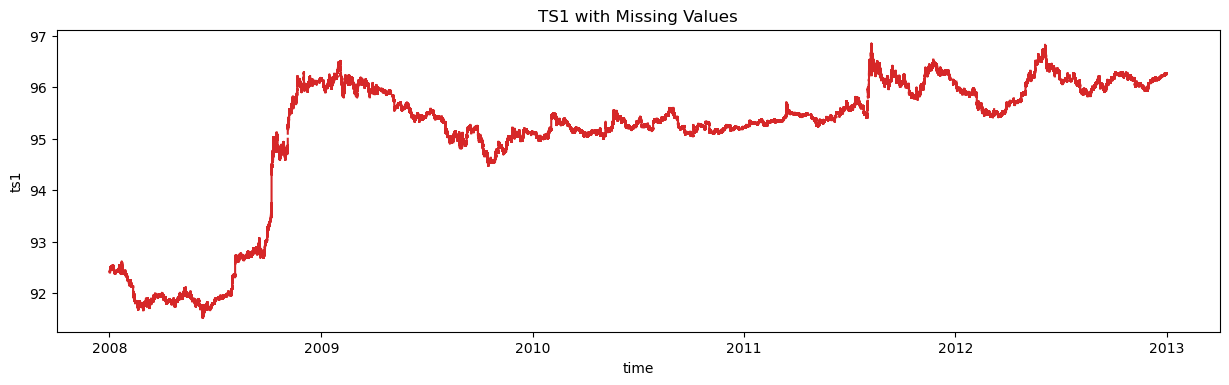

In [14]:
plot_df(df, x=df['time'], y=df['ts1'], ylabel='ts1', title='TS1 with Missing Values')

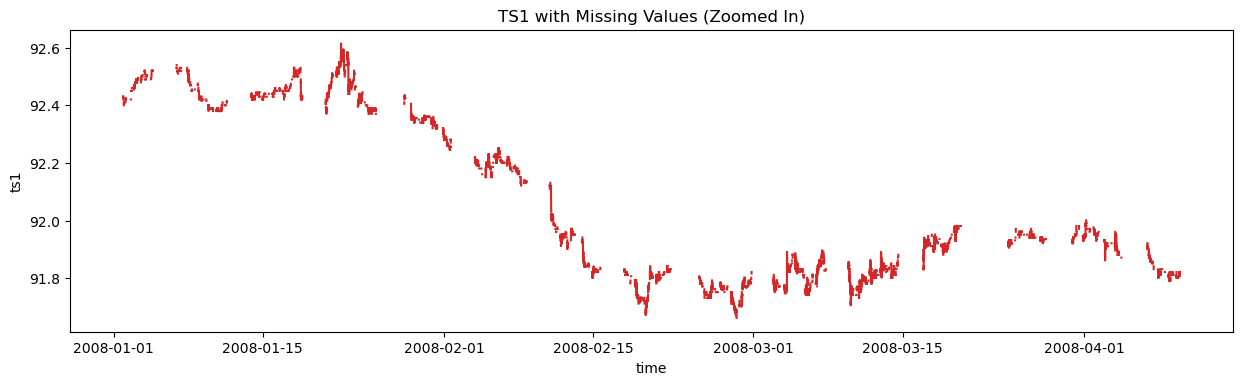

In [15]:
plot_df(df, x=df['time'][:72000], y=df['ts1'][:72000], ylabel='ts1', title='TS1 with Missing Values (Zoomed In)')

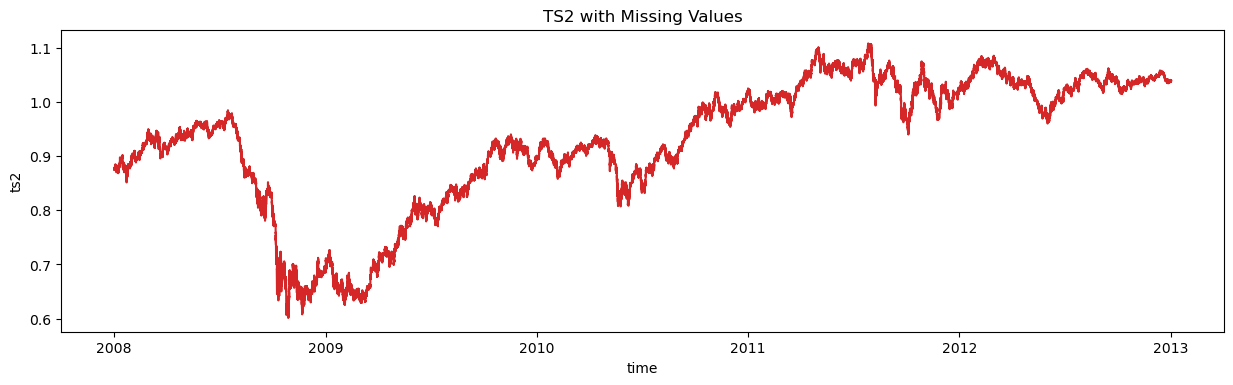

In [16]:
plot_df(df, x=df['time'], y=df['ts2'], ylabel='ts2', title='TS2 with Missing Values')

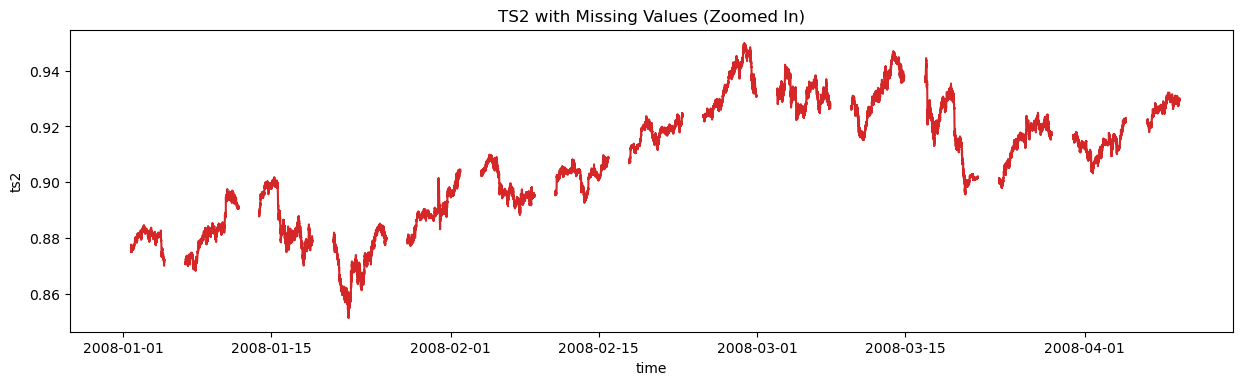

In [17]:
plot_df(df, x=df['time'][:72000], y=df['ts2'][:72000], ylabel='ts2', title='TS2 with Missing Values (Zoomed In)')

<h4>Handling Missing Values</h4>

<h5>Resampling</h5>

In [18]:
# Downsample the data to a daily basis
df = df[['time','ts1', 'ts2']].resample('D', on='time').mean().reset_index(drop=False)
df

,time,ts1,ts2
0,2008-01-01,92.413896,0.876295
1,2008-01-02,92.443032,0.880780
2,2008-01-03,92.493835,0.881616
3,2008-01-04,92.507246,0.878217
4,2008-01-05,NaN,NaN
...,...,...,...
1823,2012-12-28,96.248195,1.037871
1824,2012-12-29,NaN,NaN
1825,2012-12-30,96.262041,1.037483
1826,2012-12-31,96.267783,1.038810


In [19]:
# Manually fill the last row NaN
df.at[1827, 'ts1'] = 96.267783

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1828 non-null   datetime64[ns]
 1   ts1     1535 non-null   float64       
 2   ts2     1564 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.0 KB


<h5>Visualization of resampled data</h5>

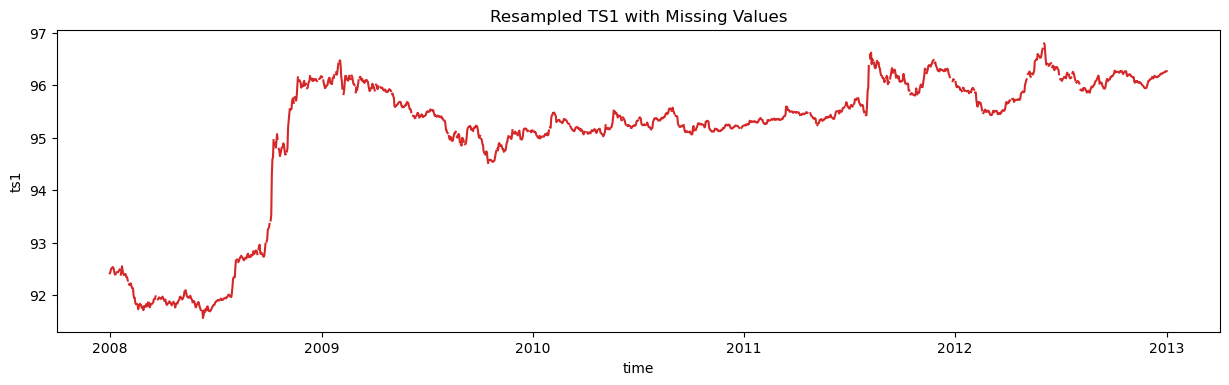

In [21]:
plot_df(df, x=df['time'], y=df['ts1'], ylabel='ts1', title='Resampled TS1 with Missing Values')

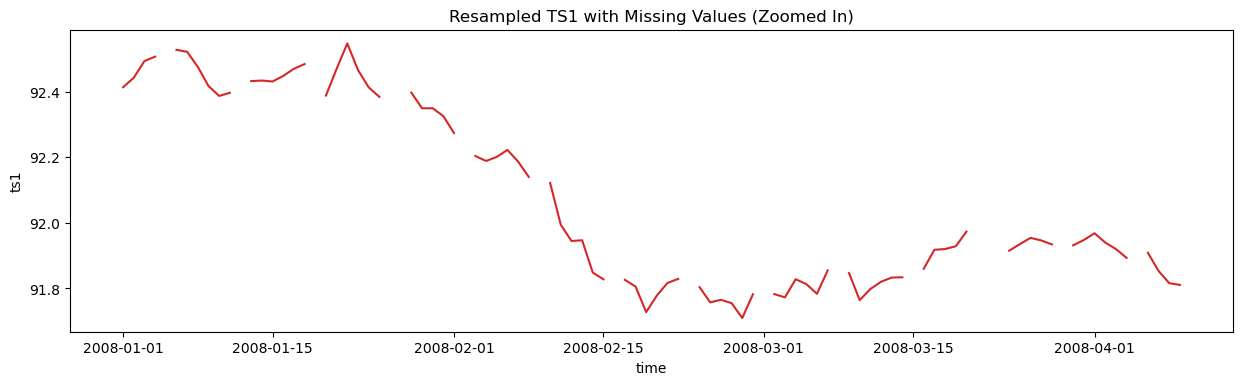

In [22]:
plot_df(df, x=df['time'][:100], y=df['ts1'][:100], ylabel='ts1', title='Resampled TS1 with Missing Values (Zoomed In)')

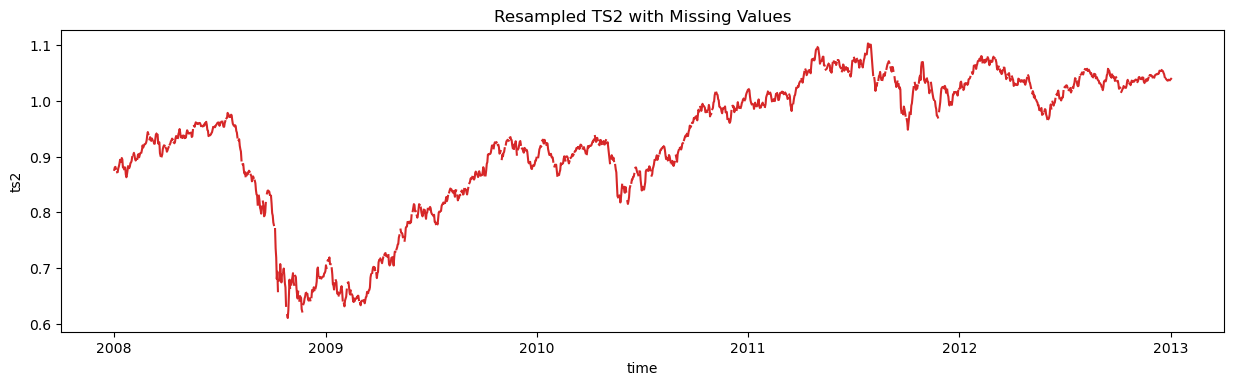

In [23]:
plot_df(df, x=df['time'], y=df['ts2'], ylabel='ts2', title='Resampled TS2 with Missing Values')

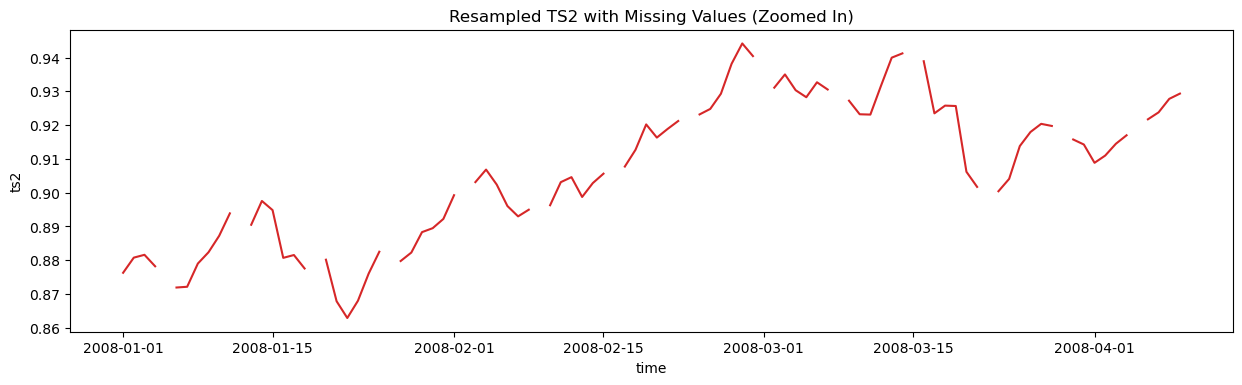

In [24]:
plot_df(df, x=df['time'][:100], y=df['ts2'][:100], ylabel='ts2', title='Resampled TS2 with Missing Values (Zoomed In)')

<h5>Interpolation</h5>

In [25]:
df.interpolate(method='polynomial', order=1, inplace=True)

In [26]:
df

,time,ts1,ts2
0,2008-01-01,92.413896,0.876295
1,2008-01-02,92.443032,0.880780
2,2008-01-03,92.493835,0.881616
3,2008-01-04,92.507246,0.878217
4,2008-01-05,92.517605,0.875075
...,...,...,...
1823,2012-12-28,96.248195,1.037871
1824,2012-12-29,96.255118,1.037677
1825,2012-12-30,96.262041,1.037483
1826,2012-12-31,96.267783,1.038810


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1828 non-null   datetime64[ns]
 1   ts1     1828 non-null   float64       
 2   ts2     1828 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.0 KB


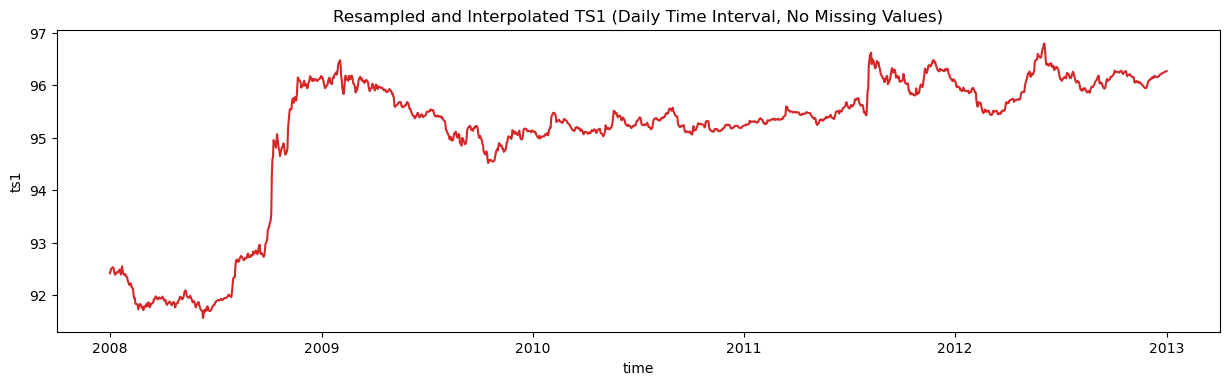

In [28]:
plot_df(df, x=df['time'], y=df['ts1'], ylabel='ts1', title='Resampled and Interpolated TS1 (Daily Time Interval, No Missing Values)')

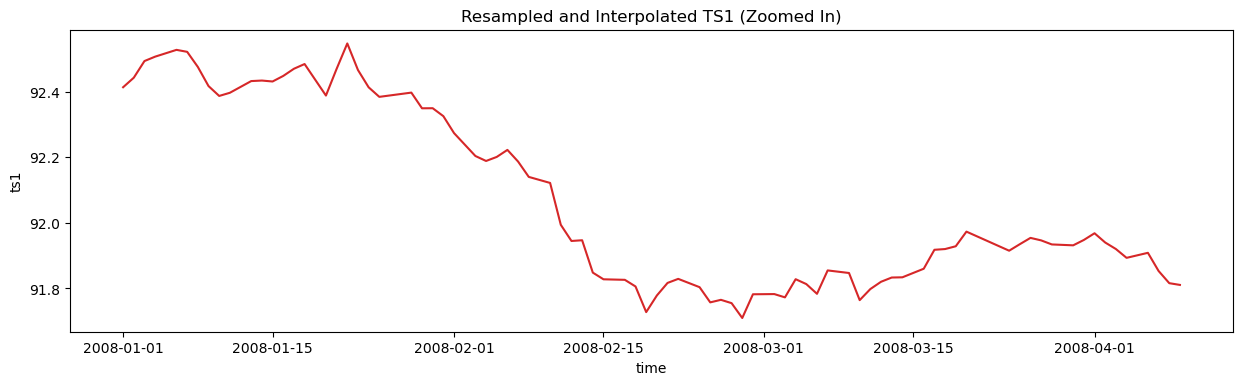

In [29]:
plot_df(df, x=df['time'][:100], y=df['ts1'][:100], ylabel='ts1', title='Resampled and Interpolated TS1 (Zoomed In)')

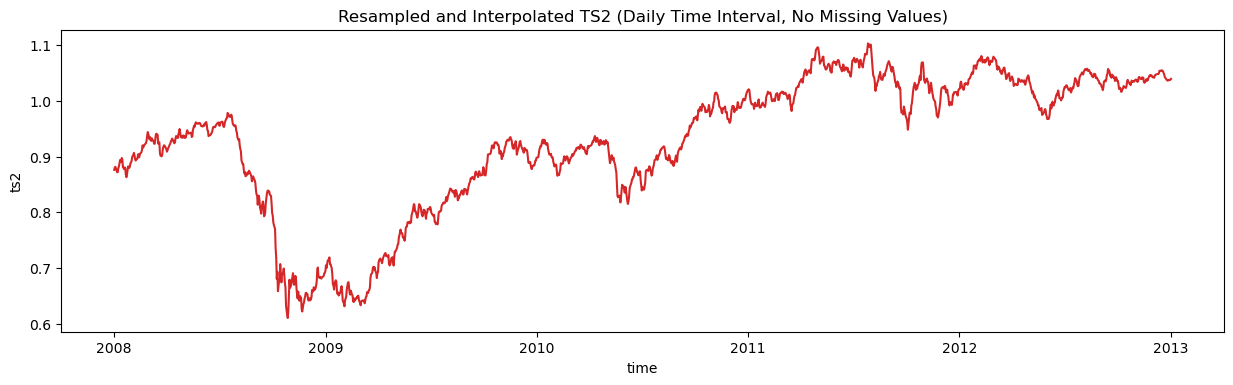

In [30]:
plot_df(df, x=df['time'], y=df['ts2'], ylabel='ts2', title='Resampled and Interpolated TS2 (Daily Time Interval, No Missing Values)')

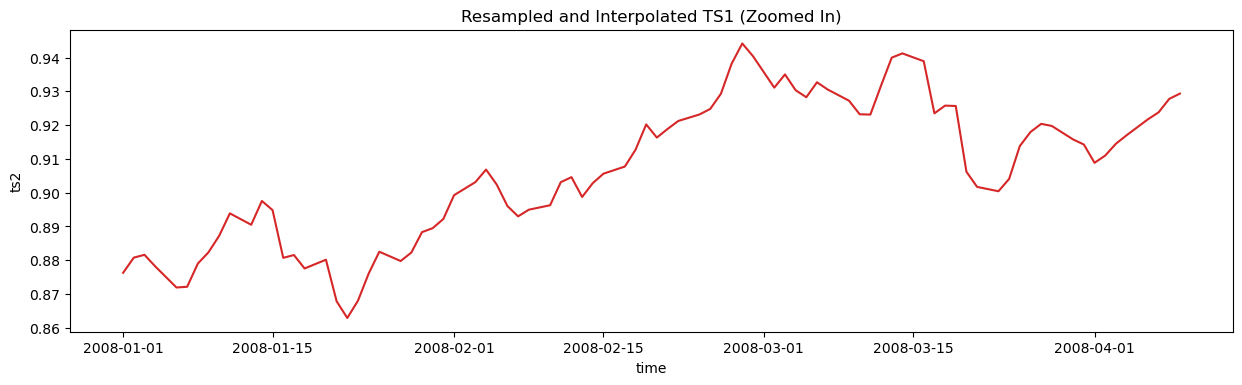

In [31]:
plot_df(df, x=df['time'][:100], y=df['ts2'][:100], ylabel='ts2', title='Resampled and Interpolated TS1 (Zoomed In)')

<h4>Seasonality</h4>

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
df['week'] = df['time'].dt.week
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

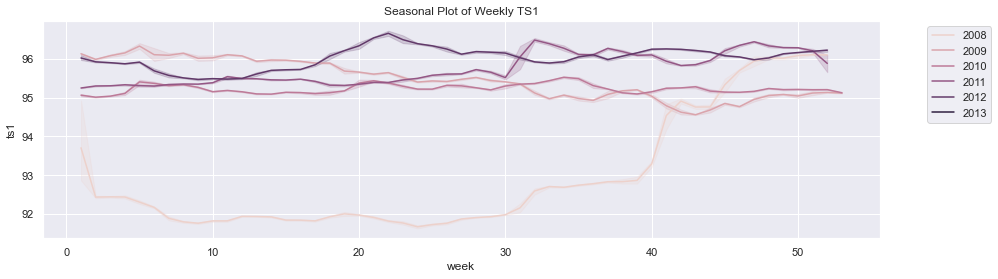

In [34]:
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='week', y='ts1', hue='year')
plt.title('Seasonal Plot of Weekly TS1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

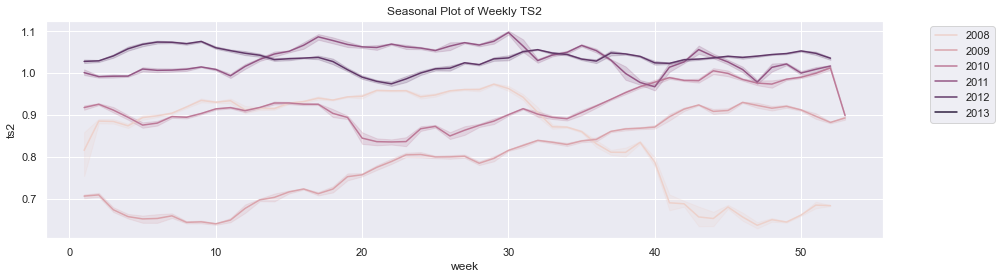

In [35]:
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='week', y='ts2', hue='year')
plt.title('Seasonal Plot of Weekly TS2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

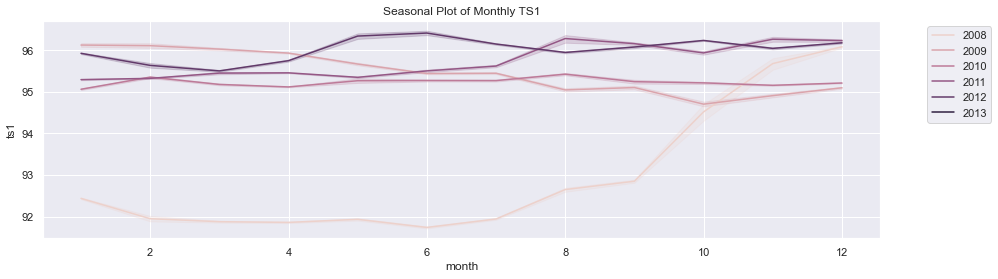

In [36]:
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='month', y='ts1', hue='year')
plt.title('Seasonal Plot of Monthly TS1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

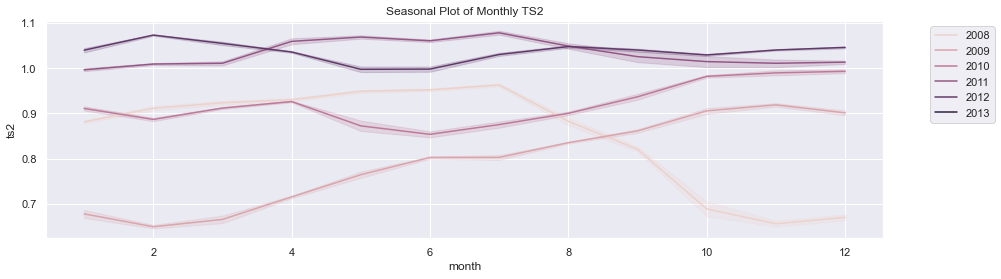

In [37]:
sns.set(rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='month', y='ts2', hue='year')
plt.title('Seasonal Plot of Monthly TS2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

<h4>Stationarity</h4>

In [38]:
import datetime
from statsmodels.tsa.stattools import adfuller

In [39]:
# ts1 ADF test
result = adfuller(df.ts1.values, autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 0.3300662865534538


In [40]:
# ts2 ADF test
result = adfuller(df.ts2.values, autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 0.6752174268449735


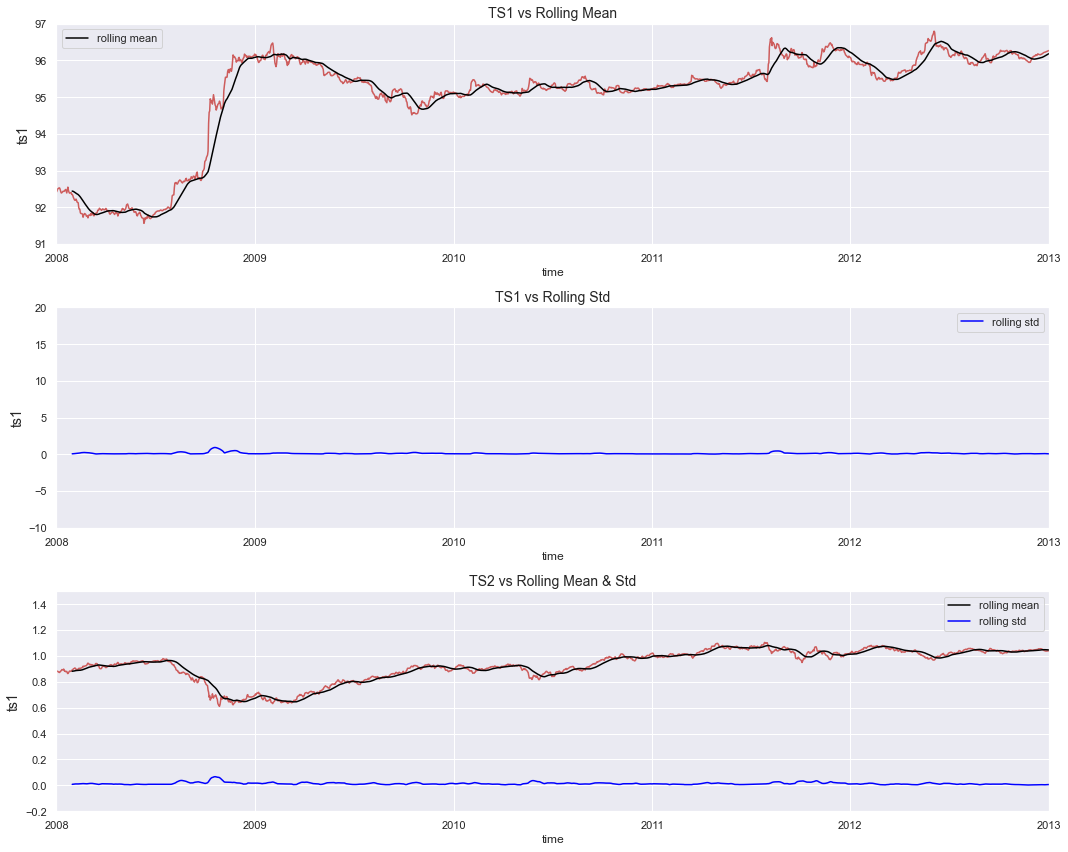

In [41]:
rolling_window = 30
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.time, y=df.ts1, ax=ax[0], color='indianred')
sns.lineplot(x=df.time, y=df.ts1.rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
ax[0].set_title('TS1 vs Rolling Mean', fontsize=14)
ax[0].set_ylabel(ylabel='ts1', fontsize=14)

ax[0].set_xlim([datetime.date(2008, 1, 1), datetime.date(2013, 1, 1)])
ax[0].set_ylim([91, 97])

sns.lineplot(x=df.time, y=df.ts1, ax=ax[1], color='indianred')
sns.lineplot(x=df.time, y=df.ts1.rolling(rolling_window).std(), ax=ax[1], color='blue', label='rolling std')
ax[1].set_title('TS1 vs Rolling Std', fontsize=14)
ax[1].set_ylabel(ylabel='ts1', fontsize=14)

ax[1].set_xlim([datetime.date(2008, 1, 1), datetime.date(2013, 1, 1)])
ax[1].set_ylim([-10, 20])

sns.lineplot(x=df.time, y=df.ts2, ax=ax[2], color='indianred')
sns.lineplot(x=df.time, y=df.ts2.rolling(rolling_window).mean(), ax=ax[2], color='black', label='rolling mean')
sns.lineplot(x=df.time, y=df.ts2.rolling(rolling_window).std(), ax=ax[2], color='blue', label='rolling std')
ax[2].set_title('TS2 vs Rolling Mean & Std', fontsize=14)
ax[2].set_ylabel(ylabel='ts1', fontsize=14)

ax[2].set_xlim([datetime.date(2008, 1, 1), datetime.date(2013, 1, 1)])
ax[2].set_ylim([-0.2, 1.5])

plt.tight_layout()
plt.show()

<h4>Reaching Stationarity</h4>

In [42]:
# Logariphmic transform
df['ts1_log'] = np.log(df.ts1)
df['ts2_log'] = np.log(df.ts2)

In [43]:
# Differencing
df['ts1_log_dif'] = df.ts1_log - df.ts1_log.shift(1)
df['ts2_log_dif'] = df.ts2_log - df.ts2_log.shift(1)

In [44]:
df.head()

,time,ts1,ts2,week,month,year,ts1_log,ts2_log,ts1_log_dif,ts2_log_dif
0,2008-01-01,92.413896,0.876295,1,1,2008,4.526277,-0.132053,NaN,NaN
1,2008-01-02,92.443032,0.880780,1,1,2008,4.526593,-0.126948,0.000315,0.005105
2,2008-01-03,92.493835,0.881616,1,1,2008,4.527142,-0.125999,0.000549,0.000949
3,2008-01-04,92.507246,0.878217,1,1,2008,4.527287,-0.129862,0.000145,-0.003862
4,2008-01-05,92.517605,0.875075,1,1,2008,4.527399,-0.133446,0.000112,-0.003584


In [45]:
df.drop(labels = 0, axis = 0, inplace=True)

In [46]:
df.head()

,time,ts1,ts2,week,month,year,ts1_log,ts2_log,ts1_log_dif,ts2_log_dif
1,2008-01-02,92.443032,0.880780,1,1,2008,4.526593,-0.126948,0.000315,0.005105
2,2008-01-03,92.493835,0.881616,1,1,2008,4.527142,-0.125999,0.000549,0.000949
3,2008-01-04,92.507246,0.878217,1,1,2008,4.527287,-0.129862,0.000145,-0.003862
4,2008-01-05,92.517605,0.875075,1,1,2008,4.527399,-0.133446,0.000112,-0.003584
5,2008-01-06,92.527965,0.871933,1,1,2008,4.527511,-0.137043,0.000112,-0.003597


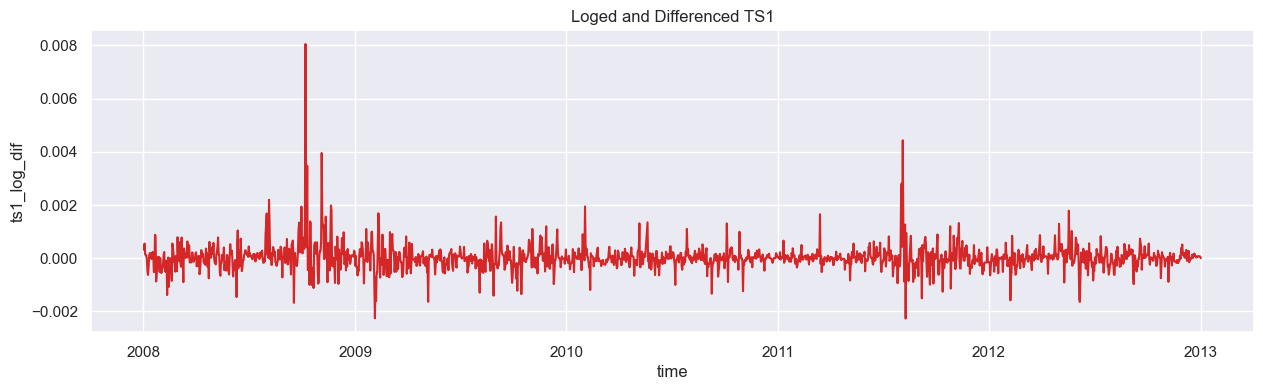

In [47]:
plot_df(df, x=df['time'], y=df['ts1_log_dif'], ylabel='ts1_log_dif', title='Loged and Differenced TS1')

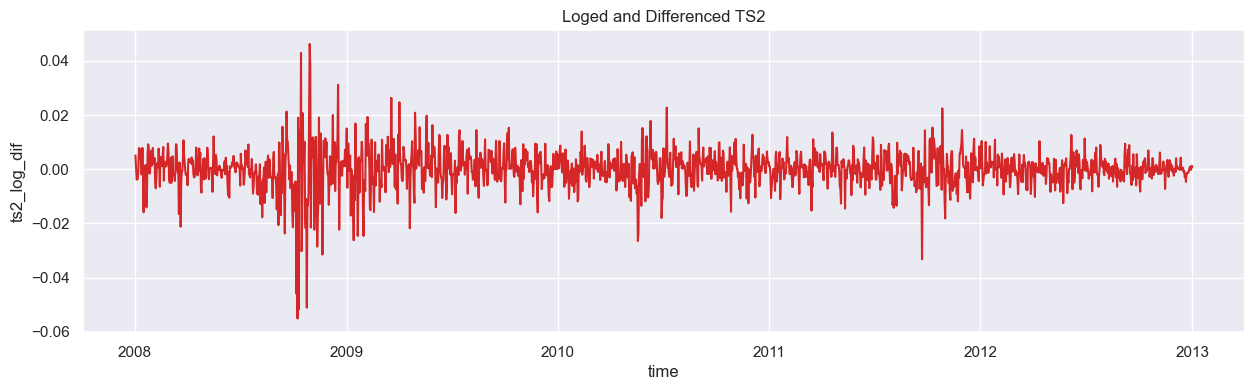

In [48]:
plot_df(df, x=df['time'], y=df['ts2_log_dif'], ylabel='ts2_log_dif', title='Loged and Differenced TS2')

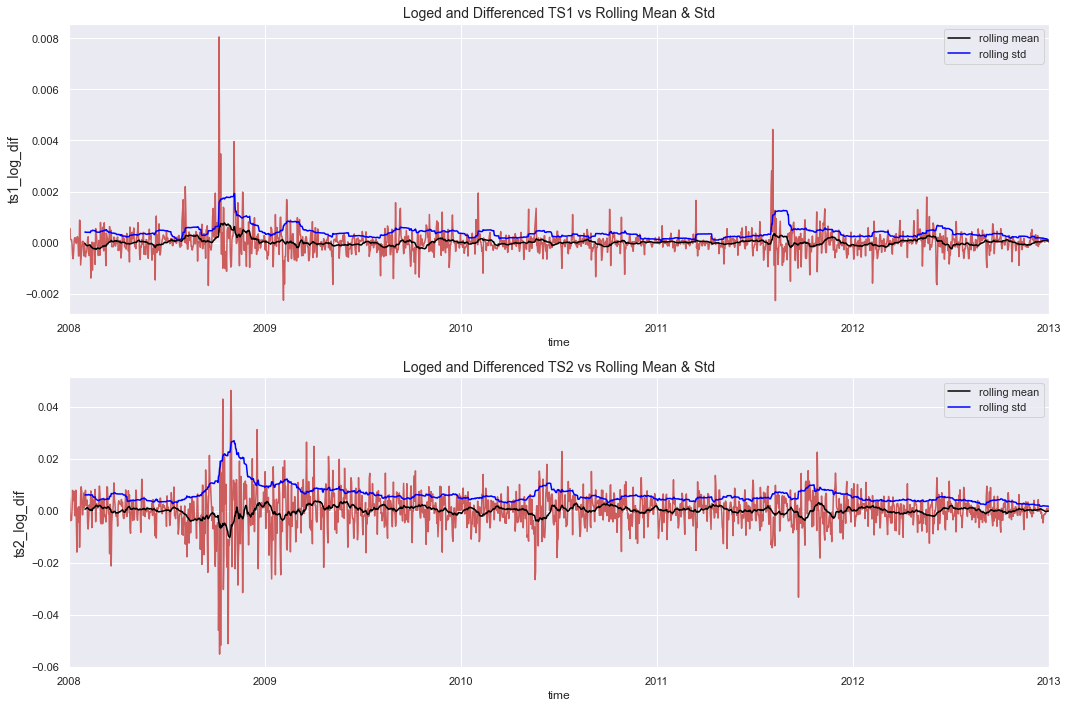

In [49]:
rolling_window = 30
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.lineplot(x=df.time, y=df.ts1_log_dif, ax=ax[0], color='indianred')
sns.lineplot(x=df.time, y=df.ts1_log_dif.rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df.time, y=df.ts1_log_dif.rolling(rolling_window).std(), ax=ax[0], color='blue', label='rolling std')
ax[0].set_title('Loged and Differenced TS1 vs Rolling Mean & Std', fontsize=14)
ax[0].set_ylabel(ylabel='ts1_log_dif', fontsize=14)

ax[0].set_xlim([datetime.date(2008, 1, 1), datetime.date(2013, 1, 1)])

sns.lineplot(x=df.time, y=df.ts2_log_dif, ax=ax[1], color='indianred')
sns.lineplot(x=df.time, y=df.ts2_log_dif.rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df.time, y=df.ts2_log_dif.rolling(rolling_window).std(), ax=ax[1], color='blue', label='rolling std')
ax[1].set_title('Loged and Differenced TS2 vs Rolling Mean & Std', fontsize=14)
ax[1].set_ylabel(ylabel='ts2_log_dif', fontsize=14)

ax[1].set_xlim([datetime.date(2008, 1, 1), datetime.date(2013, 1, 1)])

plt.tight_layout()
plt.show()

In [50]:
result = adfuller(df.ts1_log_dif.values, autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 9.883902386802027e-25


In [51]:
result = adfuller(df.ts2_log_dif.values, autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 9.381181531216481e-16


<h4>Forecasting</h4>

<h5>VAR - Vector Autoregression</h5>

In [52]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
warnings.filterwarnings("ignore")

In [53]:
# For VAR model, we use loged and differenced data
df_log_dif = df[['time', 'ts1_log_dif', 'ts2_log_dif']].copy()
df_log_dif.set_index('time', drop=True, inplace=True)
df_log_dif.head()

,ts1_log_dif,ts2_log_dif
time,,
2008-01-02,0.000315,0.005105
2008-01-03,0.000549,0.000949
2008-01-04,0.000145,-0.003862
2008-01-05,0.000112,-0.003584
2008-01-06,0.000112,-0.003597


In [54]:
df_log_dif.corr()

,ts1_log_dif,ts2_log_dif
ts1_log_dif,1.000000,-0.539677
ts2_log_dif,-0.539677,1.000000


In [55]:
# Train-test split
train1= df_log_dif[:-365]
test1 = df_log_dif[-365:]

In [56]:
train1

,ts1_log_dif,ts2_log_dif
time,,
2008-01-02,0.000315,0.005105
2008-01-03,0.000549,0.000949
2008-01-04,0.000145,-0.003862
2008-01-05,0.000112,-0.003584
2008-01-06,0.000112,-0.003597
...,...,...
2011-12-29,0.000412,-0.004394
2011-12-30,-0.000109,0.008426
2011-12-31,-0.000150,0.001900


In [57]:
test1

,ts1_log_dif,ts2_log_dif
time,,
2012-01-03,-6.463241e-04,0.010440
2012-01-04,-3.726602e-04,0.001531
2012-01-05,-1.640260e-05,-0.006015
2012-01-06,1.531706e-04,-0.004311
2012-01-07,-8.647525e-05,-0.001975
...,...,...
2012-12-28,5.692364e-05,0.000936
2012-12-29,7.192843e-05,-0.000187
2012-12-30,7.192326e-05,-0.000187


In [58]:
# VAR order p selection
model = VAR(train1)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-25.22,-25.22,1.111e-11,-25.22
1,-25.36,-25.34*,9.647e-12,-25.36*
2,-25.37,-25.33,9.638e-12,-25.35
3,-25.37,-25.32,9.621e-12,-25.35
4,-25.38,-25.31,9.536e-12,-25.35
5,-25.38,-25.30,9.534e-12,-25.35
6,-25.38,-25.28,9.531e-12,-25.34
7,-25.37,-25.26,9.553e-12,-25.33
8,-25.40,-25.27,9.341e-12,-25.35
9,-25.39,-25.26,9.370e-12,-25.34


In [59]:
# Model building
model_fitted = model.fit(12)
z = model_fitted.forecast(y=train1.values[-12:], steps=365)
idx = pd.date_range(start='2012-01-02',periods=365,freq='D')
df_forecast = pd.DataFrame(z,index=idx,columns=['ts1_log_dif','ts2_log_dif'])

In [60]:
df_forecast

,ts1_log_dif,ts2_log_dif
2012-01-02,-0.000078,0.000554
2012-01-03,-0.000050,0.000914
2012-01-04,0.000031,0.001280
2012-01-05,0.000046,0.000640
2012-01-06,0.000032,-0.000905
...,...,...
2012-12-27,0.000026,0.000100
2012-12-28,0.000026,0.000100
2012-12-29,0.000026,0.000100
2012-12-30,0.000026,0.000100


In [61]:
ts1_cumsum = df_forecast['ts1_log_dif'].cumsum()
ts2_cumsum = df_forecast['ts2_log_dif'].cumsum()

In [62]:
df_forecast['ts1_log'] = df['ts1_log'].iloc[0]
df_forecast['ts1_log'] = df_forecast['ts1_log'].add(ts1_cumsum, fill_value=0)

df_forecast['ts2_log'] = df['ts2_log'].iloc[0]
df_forecast['ts2_log'] = df_forecast['ts2_log'].add(ts2_cumsum, fill_value=0)

In [63]:
df_forecast['ts1'] = np.exp(df_forecast['ts1_log'])

df_forecast['ts2'] = np.exp(df_forecast['ts2_log'])

In [64]:
df_forecast

,ts1_log_dif,ts2_log_dif,ts1_log,ts2_log,ts1,ts2
2012-01-02,-0.000078,0.000554,4.526514,-0.126394,92.435813,0.881268
2012-01-03,-0.000050,0.000914,4.526465,-0.125479,92.431203,0.882074
2012-01-04,0.000031,0.001280,4.526496,-0.124199,92.434097,0.883204
2012-01-05,0.000046,0.000640,4.526542,-0.123560,92.438338,0.883769
2012-01-06,0.000032,-0.000905,4.526573,-0.124464,92.441257,0.882970
...,...,...,...,...,...,...
2012-12-27,0.000026,0.000100,4.535788,-0.087985,93.296978,0.915775
2012-12-28,0.000026,0.000100,4.535814,-0.087885,93.299427,0.915866
2012-12-29,0.000026,0.000100,4.535840,-0.087786,93.301876,0.915957
2012-12-30,0.000026,0.000100,4.535866,-0.087686,93.304324,0.916049


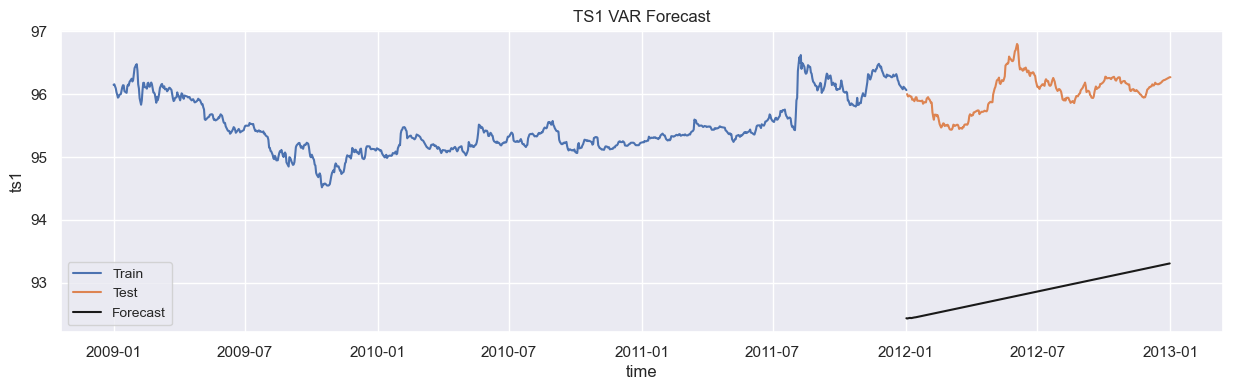

In [65]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(df.time[365:-365], df.ts1[365:-365], label='Train')
plt.plot(df.time[-365:], df.ts1[-365:], label='Test')
plt.plot(df_forecast.ts1, 'k',label='Forecast')
plt.title('TS1 VAR Forecast')
plt.legend(loc='lower left', fontsize=10)
plt.gca().set(xlabel='time', ylabel='ts1')
plt.show()

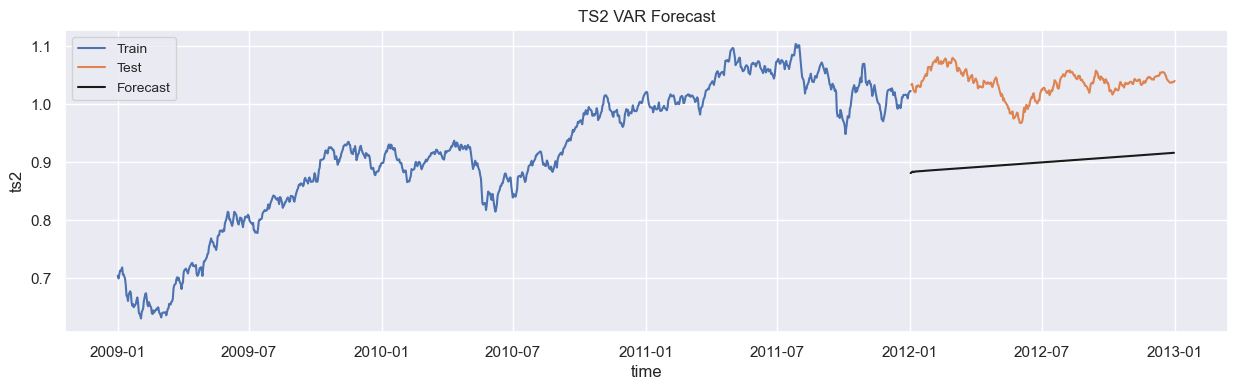

In [66]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(df.time[365:-365], df['ts2'][365:-365], label='Train')
plt.plot(df.time[-365:], df.ts2[-365:], label='Test')
plt.plot(df_forecast.ts2, 'k', label='Forecast')
plt.title('TS2 VAR Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.gca().set(xlabel='time', ylabel='ts2')
plt.show()

<h5>Evaluation</h5>

In [67]:
RMSE1 = rmse(df['ts1'][-365:], df_forecast['ts1'])
print(f'TS1 VAR(12) RMSE: {RMSE1:.3f}')

TS1 VAR(12) RMSE: 3.167


In [68]:
RMSE2 = rmse(df['ts2'][-365:], df_forecast['ts2'])
print(f'TS2 VAR(12) RMSE: {RMSE2:.3f}')

TS2 VAR(12) RMSE: 0.139


<h5>ARIMA - Autoregressive Integrated Moving Average</h5>

In [69]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math

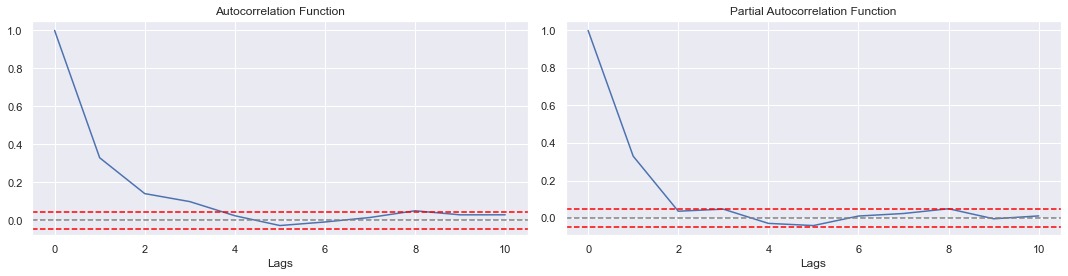

In [70]:
lag_acf = acf(df.ts1_log_dif, nlags=10)
lag_pacf = pacf(df.ts1_log_dif, nlags=10, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df.ts1_log_dif)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df.ts1_log_dif)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df.ts1_log_dif)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df.ts1_log_dif)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [71]:
df_ts1 = df[['time', 'ts1_log']].copy()
df_ts1.set_index('time', drop=True, inplace=True)
df_ts1.head()

,ts1_log
time,
2008-01-02,4.526593
2008-01-03,4.527142
2008-01-04,4.527287
2008-01-05,4.527399
2008-01-06,4.527511


In [72]:
# Train-test split
split_date = '2012-01-01'
train2 = df_ts1['ts1_log'].loc[:split_date]
test2 = df_ts1['ts1_log'].loc[split_date:]

In [73]:
# Model building
model = ARIMA(train2, order=(2, 1, 3))  
fitted = model.fit(disp=-1)  

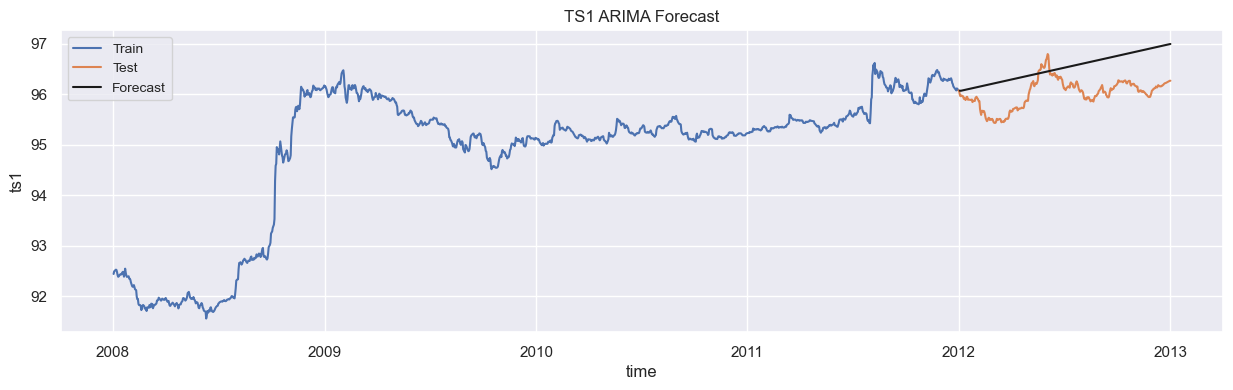

In [74]:
fc, se, conf = fitted.forecast(365)

fc_series = pd.Series(fc, index=test2.index[:-2])

plt.figure(figsize=(15,4), dpi=100)
plt.plot(df_ts1.index[:-366], np.exp(train2), label='Train')
plt.plot(df_ts1.index[-367:], np.exp(test2), label='Test')
plt.plot(df_ts1.index[-365:], np.exp(fc_series), 'k', label='Forecast')
plt.title('TS1 ARIMA Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.gca().set(xlabel='time', ylabel='ts1')
plt.show()

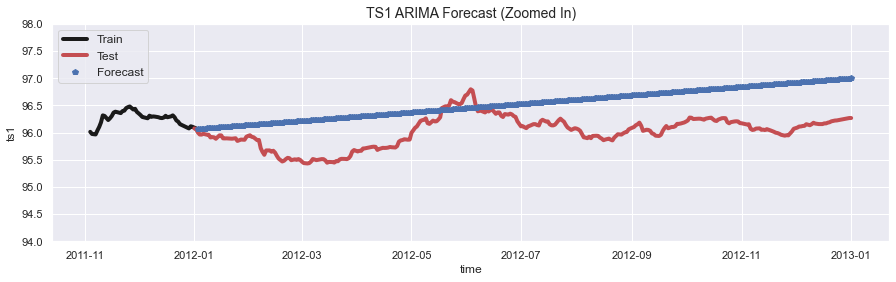

In [75]:
plt.figure(figsize=(15, 4))
plt.title('TS1 ARIMA Forecast (Zoomed In)', fontsize=14)
plt.plot(df_ts1.index[-425:-365], np.exp(train2.tail(60)), 'k', linewidth=4.0, label='Train')
plt.plot(df_ts1.index[-367:], np.exp(test2), 'r', linewidth=4.0, label='Test')
plt.plot(df_ts1.index[-365:], np.exp(fc_series), 'bp', label='Forecast')
plt.legend(loc='upper left', fontsize=12)
plt.gca().set(xlabel='time', ylabel='ts1')
plt.ylim(94,98)
plt.show()

<h5>Evaluation</h5>

In [76]:
mse = mean_squared_error(np.exp(test2[:-2]), np.exp(fc_series))
mae = mean_absolute_error(np.exp(test2[:-2]), np.exp(fc_series))
rmse = math.sqrt(mse)

In [77]:
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  0.3396914844431054
Root Mean Squared Error:  0.582830579536717
Mean Absolute Error:  0.5276144493247369
